# KD-Tree
Un **K-dimensional** tree est un arbre binaire dans lequel chaque noeud est un point en k-dimension. Chaque noeud divise par la suite l'espace en 2 partie qu'on appelle **half-space**. Tout le points étant dans un half-space donné sont contenus dans le sous-arbre à gauche du noeud, et les points se trouvant à droite, sont contenus dans le sous-arbre à droite.

Pour bien comprendre comment l'algorithme fonctionne, nous allons débuter avec un exercice sur papier.

## Exercice 1 : Papier
Ci-dessous, vous trouverez une liste de points à placer dans un Kd-tree, avec k = 2. Dessinez l'arbre qui en résulte ainsi que la division de l'espace qui en résulte.
Liste de points : (0,10),(-10,0),(20,-5),(-12,-7),(-15,5),(0,6),(5,-6),(8,7),(7,-15),(15,7)


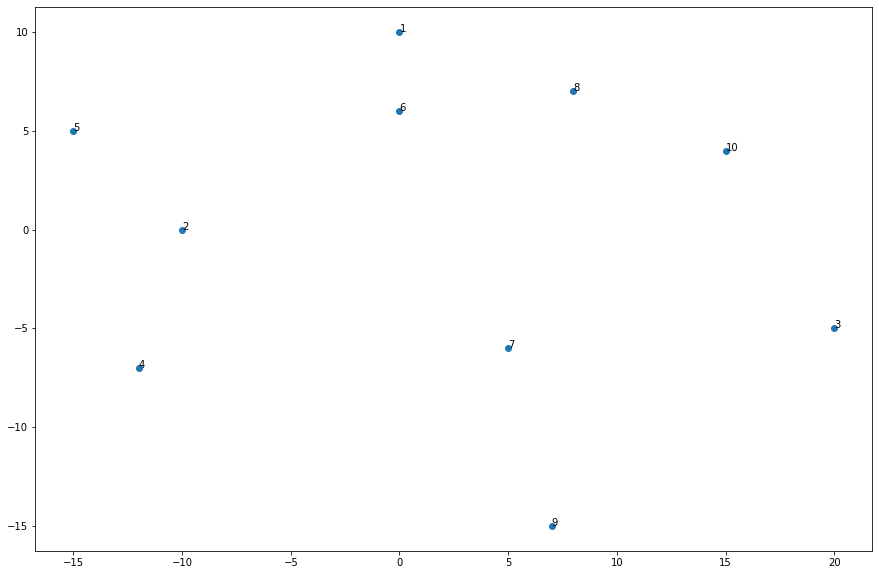

In [21]:
import matplotlib.pyplot as plt
liste = [[0,10],[-10,0],[20,-5],[-12,-7],[-15,5],[0,6],[5,-6],[8,7],[7,-15],[15,4]]#Liste des points
n = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (15,10))

#Un bout de code pour représenter notre ensemble de point
plt.scatter([i[0] for i in liste], [i[1] for i in liste])
for i, txt in enumerate(n):
    plt.annotate(txt, (liste[i][0], liste[i][1]))

L'arbre résultant est le suivant. Vous pouvez remarquer que tout les noeuds se situant au même niveau divise l'espace selont le même axe. Lorsqu'on va à droite dans l'arbre, les coordonnées selon l'axe de division augmentent, et lorsque l'on va a gauche, elles diminuent. Par exemple, le point 8 divise l'espace de façon verticale, et le point 10 a une coordonnée x supérieur à celle du point 8. A l'inverse, si l'on considère le point 2, il divise l'espace de façon horizontale, et le point 4, se trouvant dans le sous-arbre de gauche a une coordonnée y inférieur à celle du point 2.

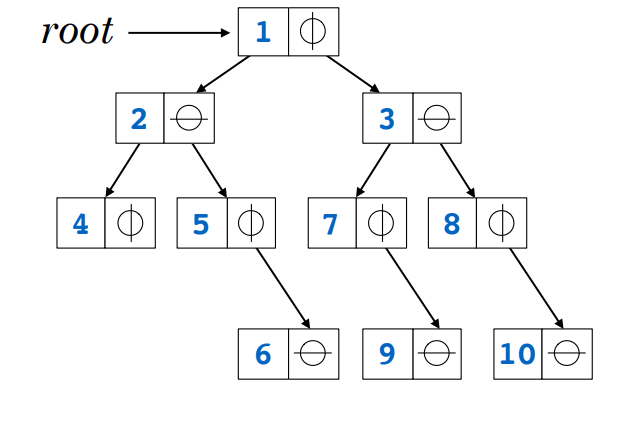

La division de l'espace qui en résulte est la suivante.

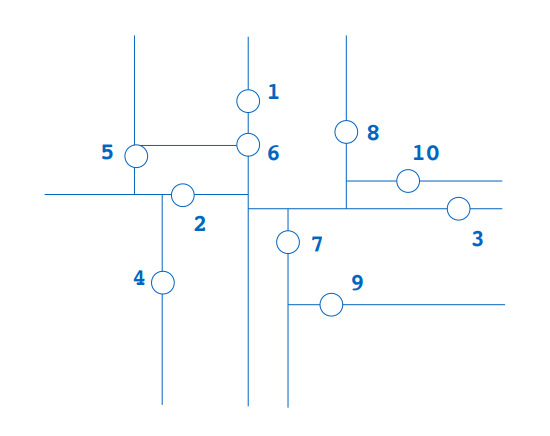

# Exercice 2 : Python

La manière de construire le Kd-Tree devrait maintenant être plus claire. Nous allons donc nous intéresser à un programme permettant d'ajouter un noeud à l'arbre. Vous trouverez ci-dessous le pseudo-code qui est fournit dans le cours pour effectuer cette opération. 

Pour effectuer cette exercice, il est utile de relever que chaque noeud est de la forme : 

((x,y), noeud de gauche, noeud de droite) 

x et y étant les coordonnées du point considéré.

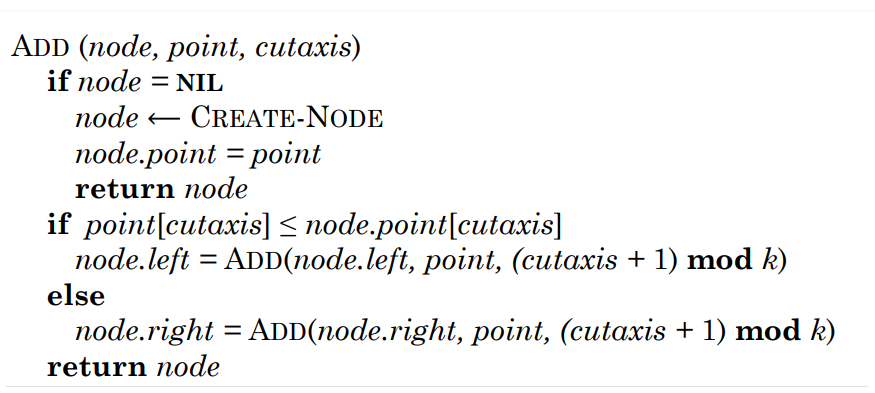

In [22]:
root = [(0,10), None, None] #Nous définissons ici juste la racine de l'arbre
k = 2 # Ici nous travaillerons en 2 dimensions
point = (-10,0) #Point que nous voulons ajouter dans le graphe

In [23]:
def add_node(node,point,cutaxis = 0):
    
    if node is None: #Si le noeud n'existe pas, nous sommes donc dans une feuille, et il faut créer le noeud
        node = [point,None,None]
        return node
    
    if point[cutaxis] <= node[0][cutaxis]: #1
        node[1] = add_node(node[1], point, cutaxis + 1 % k)
        
    else:
        node[2] = add_node(node[2], point, cutaxis + 1 % k)
        
    return node

In [24]:
add_node(root,point)

[(0, 10), [(-10, 0), None, None], None]

1) Si la coordonnée du point à ajouter est inférieure à celle du noeud selon l'axxe de découpe en considération, alors le point dois se trouve dans le sous arbre de gauche. Par convention, le noeud de gauche correspond dans la liste [(x,y), noeud de gauche, noeud de droite] à l'indice 1, par conséquent, on appelle la fonction de façon récursive pour ajouter le point, mais cette fois-ci en partant de 1 cran plus bas dans l'arbre. Cela se répète jusqu'à ce qu'on ait atteint les feuilles et qu'on nouveau noeud doivent être crée.